Use spline with smoothing to compute derivatives from measurements, instead of fitting a parametrized function. Does the Taylor expansion agrees better with the GSM result?

In [1]:
import parametrization as param
from CentralStreamingModel.utils.read_probabilities import VD, VD_los
from CentralStreamingModel.projection import generating_moments
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.interpolate import interp1d, interp2d
import seaborn as sns
from CentralStreamingModel.moments import moments2model, read
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
import taylor_tools as tt
import spline_taylor_tools as stt
sns.set_context('talk')

In [2]:
n_boxes = 5
boxsize = 1024
snapshot = 0
rm = read.Read_Mean(n_boxes, boxsize, snapshot)

/cosma6/data/dp004/dc-cues1/pv_results/halos_b1.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b2.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b3.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b4.txt
/cosma6/data/dp004/dc-cues1/pv_results/halos_b5.txt


In [3]:
parameters = [r'$m_r$',r'$c_r$',r'$c_t$',r'$\xi$']

In [4]:
ex = generating_moments.Expectations(rm.r, rm.v_r, rm.v_t,
                                     rm.jointpdf_rt)


In [5]:
s = np.arange(0.,50.,1)
mu = np.linspace(0.,1,60)


In [6]:
moments_projected = generating_moments.project(ex, rm.r_perp,
                                    rm.r_parallel)

In [7]:
gaussian = moments2model.Model(rm, moments_projected, model='gaussian')


In [8]:
gaussian.multipoles(s, mu) 

In [9]:
m_r = ex.moment(1,0)(rm.r)
c_r = ex.central_moment(2,0)(rm.r)
c_t = ex.central_moment(0,2)(rm.r)

## FIT THE LOWEST THREE MOMENTS

In [10]:
r_spl = np.linspace(np.min(rm.r), np.max(rm.r), 200)

0.11102734537588807


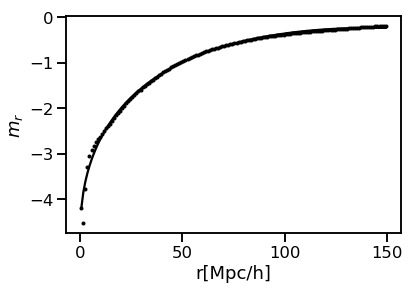

In [11]:
idx = 0

_, chi, popt_m_r = param.plot(tt.m_1, rm.r, m_r, 
        'black', 'Halos',parameters[idx], limit = 20)
#plt.text(40, -2, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))
#plt.text(40,-2,r'$m_r(r) = A \sqrt{r} + B r + C$')

Text(0.5,0,'r [Mpc/h]')

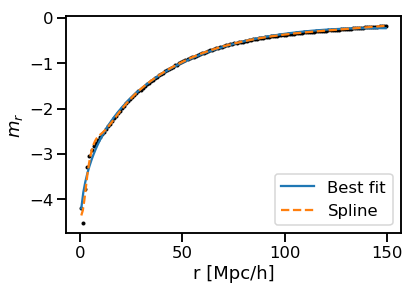

In [12]:
m_r_spl = UnivariateSpline(rm.r, m_r, k = 3, s = 0.2)


plt.plot(rm.r, m_r, color = 'black', linestyle= '',
         marker = 'o', markersize = 3)
plt.plot(rm.r, tt.m_1(rm.r, *popt_m_r), label = 'Best fit')
plt.plot(r_spl, m_r_spl(r_spl), linestyle = 'dashed', label = 'Spline')

plt.legend()
plt.ylabel('$m_r$')
plt.xlabel('r [Mpc/h]')

Text(0.5,0,'r [Mpc/h]')

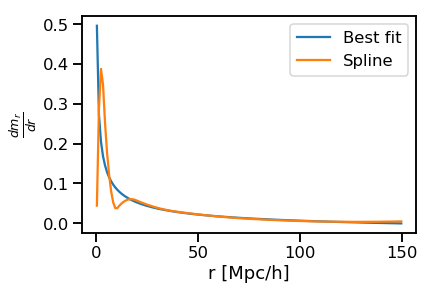

In [13]:
plt.plot(rm.r, tt.first_m1_dot(rm.r, popt_m_r), label = 'Best fit')
plt.plot(rm.r, m_r_spl.derivative()(rm.r), label = 'Spline')

plt.legend()
plt.ylabel(r'$\frac{d m_r}{d r}$')
plt.xlabel('r [Mpc/h]')

Text(0.5,0,'r [Mpc/h]')

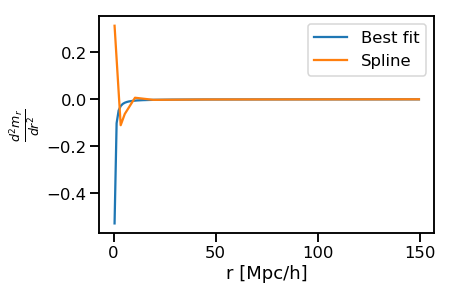

In [14]:
plt.plot(rm.r, tt.second_m1_dot(rm.r, popt_m_r), label = 'Best fit')
plt.plot(rm.r, m_r_spl.derivative(n = 2)(rm.r), label = 'Spline')
plt.legend()
plt.ylabel(r'$\frac{d^2 m_r}{d r^2}$')
plt.xlabel('r [Mpc/h]')

2.314160745363169


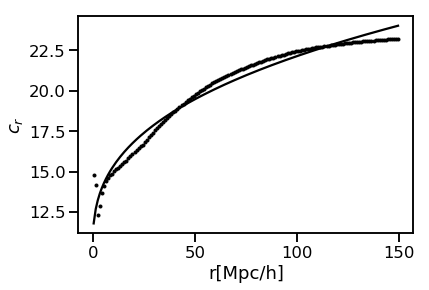

In [15]:
idx = 1

_, chi, popt_c_r = param.plot(tt.c_2, rm.r, c_r, 
        'black', 'Halos',parameters[idx], limit = 0)
#plt.text(40,5,r'$c_r(r) = A r^B + C$')

#plt.xlim(10,150)

Text(0.5,0,'r [Mpc/h]')

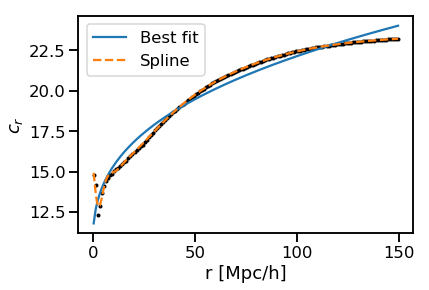

In [16]:
c_r_spl = UnivariateSpline(rm.r, c_r, k = 3, s = 0.8)


plt.plot(rm.r, c_r, color = 'black', linestyle= '',
         marker = 'o', markersize = 3)
plt.plot(rm.r, tt.c_2(rm.r, *popt_c_r), label = 'Best fit')
plt.plot(r_spl, c_r_spl(r_spl), linestyle = 'dashed', label = 'Spline')

plt.legend()
plt.ylabel(r'$c_r$')
plt.xlabel('r [Mpc/h]')

Text(0.5,0,'r [Mpc/h]')

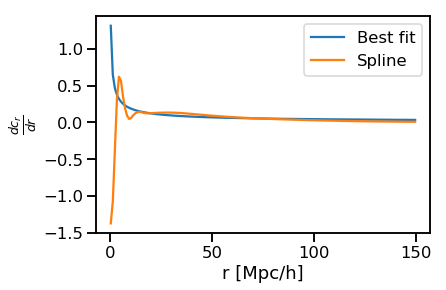

In [17]:
plt.plot(rm.r, tt.first_dot_c(rm.r, popt_c_r), label = 'Best fit')
plt.plot(rm.r, c_r_spl.derivative()(rm.r), label = 'Spline')

plt.legend()
plt.ylabel(r'$\frac{d c_r}{d r}$')
plt.xlabel('r [Mpc/h]')

Text(0.5,0,'r [Mpc/h]')

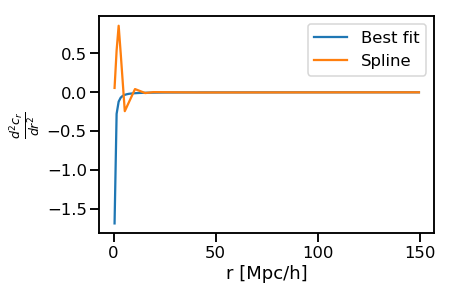

In [18]:
plt.plot(rm.r, tt.second_dot_c(rm.r, popt_c_r), label = 'Best fit')
plt.plot(rm.r, c_r_spl.derivative(n = 2)(rm.r), label = 'Spline')
plt.legend()
plt.ylabel(r'$\frac{d ^2 c_r}{d r^2}$')
plt.xlabel('r [Mpc/h]')

3.8706306673543964


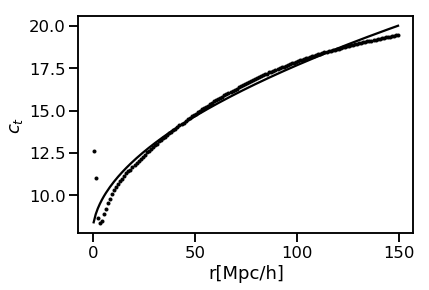

In [19]:
idx = 2

_, chi, popt_c_t = param.plot(tt.c_2, rm.r, c_t, 
        'black', 'Halos',parameters[idx], limit = 0)
#plt.text(10,15,r'$c_t(r) = A r^B + C$')


Text(0.5,0,'r [Mpc/h]')

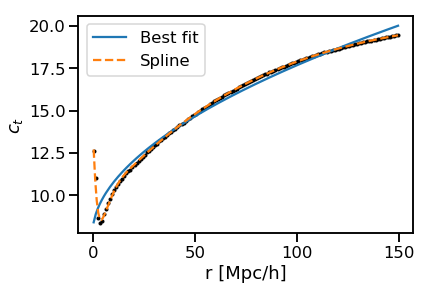

In [20]:
c_t_spl = UnivariateSpline(rm.r, c_t, k = 3, s = 0.8)


plt.plot(rm.r, c_t, color = 'black', linestyle= '',
         marker = 'o', markersize = 3)
plt.plot(rm.r, tt.c_2(rm.r, *popt_c_t), label = 'Best fit')
plt.plot(r_spl, c_t_spl(r_spl), linestyle = 'dashed', label = 'Spline')

plt.legend()
plt.ylabel(r'$c_t$')
plt.xlabel('r [Mpc/h]')

Text(0.5,0,'r [Mpc/h]')

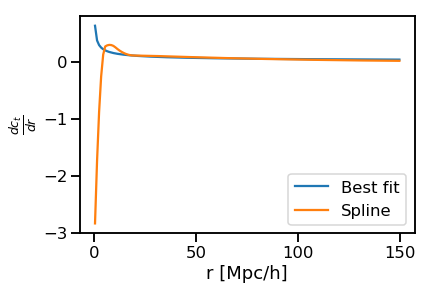

In [21]:
plt.plot(rm.r, tt.first_dot_c(rm.r, popt_c_t), label = 'Best fit')
plt.plot(rm.r, c_t_spl.derivative()(rm.r), label = 'Spline')

plt.legend()
plt.ylabel(r'$\frac{d c_t}{d r}$')
plt.xlabel('r [Mpc/h]')

Text(0.5,0,'r [Mpc/h]')

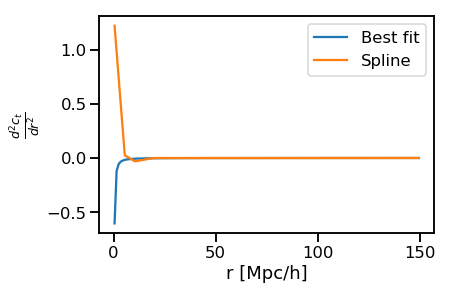

In [22]:
plt.plot(rm.r, tt.second_dot_c(rm.r, popt_c_t), label = 'Best fit')
plt.plot(rm.r, c_t_spl.derivative(n = 2)(rm.r), label = 'Spline')
plt.legend()
plt.ylabel(r'$\frac{d ^2 c_t}{d r^2}$')
plt.xlabel('r [Mpc/h]')

In [91]:
threshold = (rm.tpcf_dict['r'] > 5) & (rm.tpcf_dict['r'] < 60)

0.5700720344355771


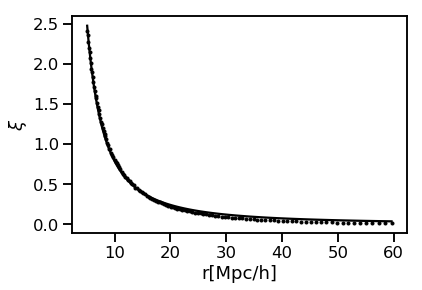

In [92]:
idx = 3

_, chi, popt_xi = param.plot(tt.xi, rm.tpcf_dict['r'][threshold], rm.tpcf_dict['tpcf'][threshold], 
        'black', 'Halos',parameters[idx], limit = 0)

#plt.text(10,15,r'$c_t(r) = A r^B + C$')

Text(0.5,0,'r [Mpc/h]')

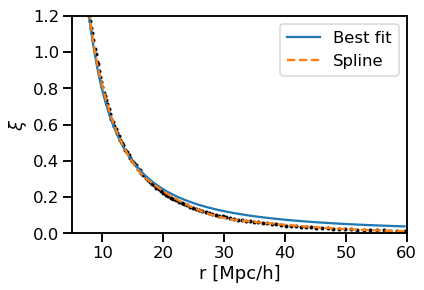

In [108]:
r_spl_xi = np.linspace(np.min(rm.tpcf_dict['r'][threshold]), 
                       np.max(rm.tpcf_dict['r'][threshold]), 
                       500)


xi_spl = UnivariateSpline(rm.tpcf_dict['r'][threshold],
            rm.tpcf_dict['tpcf'][threshold], k = 2, s = 0.005)

#xi_spl = UnivariateSpline(rm.tpcf_dict['r'][threshold],
#            rm.tpcf_dict['tpcf'][threshold], k = 3, s = 0.001)


plt.plot(rm.tpcf_dict['r'][threshold],  rm.tpcf_dict['tpcf'][threshold], color = 'black', linestyle= '',
         marker = 'o', markersize = 3)
plt.plot(rm.tpcf_dict['r'][threshold], tt.xi(rm.tpcf_dict['r'][threshold], *popt_xi), label = 'Best fit')
plt.plot(r_spl_xi, xi_spl(r_spl_xi), linestyle = 'dashed', label = 'Spline')

plt.legend()
plt.xlim(5,60)
plt.ylim(0,1.2)
plt.ylabel(r'$\xi$')
plt.xlabel('r [Mpc/h]')

In [107]:
np.std( rm.tpcf_dict['tpcf'][threshold])/len( rm.tpcf_dict['tpcf'][threshold])

0.005167054994768029

Text(0.5,0,'r [Mpc/h]')

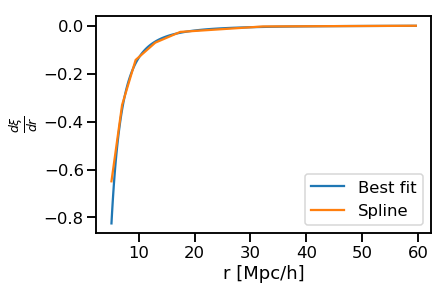

In [109]:
plt.plot(rm.tpcf_dict['r'][threshold], tt.first_xi_dot(rm.tpcf_dict['r'][threshold], popt_xi), label = 'Best fit')
plt.plot(rm.tpcf_dict['r'][threshold], xi_spl.derivative()(rm.tpcf_dict['r'][threshold]), label = 'Spline')

plt.legend()
plt.ylabel(r'$\frac{d \xi}{d r}$')
plt.xlabel('r [Mpc/h]')

Text(0.5,0,'r [Mpc/h]')

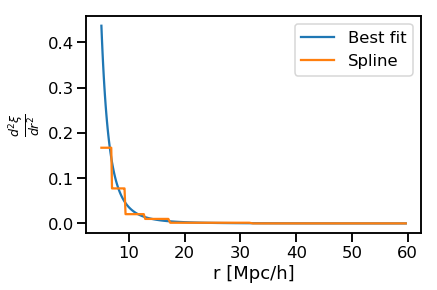

In [110]:
plt.plot(rm.tpcf_dict['r'][threshold], tt.second_xi_dot(rm.tpcf_dict['r'][threshold], popt_xi), label = 'Best fit')
plt.plot(rm.tpcf_dict['r'][threshold], xi_spl.derivative( n = 2 )(rm.tpcf_dict['r'][threshold]), label = 'Spline')

plt.legend()
plt.ylabel(r'$\frac{d^2 \xi}{d r^2}$')
plt.xlabel('r [Mpc/h]')

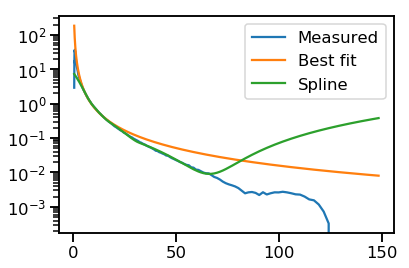

In [111]:
plt.semilogy(rm.tpcf_dict['r'], rm.tpcf_dict['tpcf'], label = 'Measured')
plt.semilogy(rm.tpcf_dict['r'], tt.xi(rm.tpcf_dict['r'], *popt_xi), label = 'Best fit')

plt.semilogy(rm.tpcf_dict['r'], xi_spl(rm.tpcf_dict['r']), label = 'Spline')

plt.legend()

## GENERATE GAUSSIAN STREAMING MODEL WITH FITTED MOMENTS

In [29]:

moments_reduced = np.zeros((len(rm.r_perp), len(rm.r_parallel), 3))


for i, rper in enumerate(rm.r_perp):                                                                                                   
    for j, rpar in enumerate(rm.r_parallel):                                                                                           

        r_ = np.sqrt(rper**2 + rpar**2)                                                                                             
        mu_value = rpar/r_                                                                                                                


        moments_reduced[i,j, 0] = m_r_spl(r_) * mu_value                                                                                  

        moments_reduced[i,j, 1] = c_r_spl(r_) * mu_value**2 \
                            + c_t_spl(r_) * (1 - mu_value**2) 



In [30]:
gaussian_reduced = moments2model.Model(rm, moments_reduced, model = 'gaussian')

In [31]:
gaussian_reduced.multipoles(s, mu) 

In [32]:
measured = moments2model.Model(rm, moments_projected, 'measured')

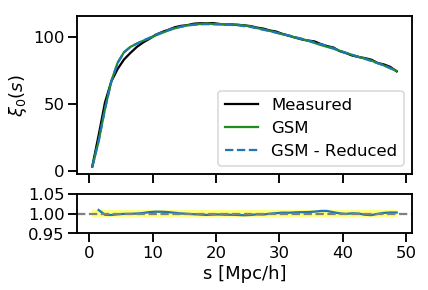

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.plot(measured.s_c, measured.s_c * measured.s_c * measured.mono,
        color = 'black', label = 'Measured')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.mono,
        color = 'forestgreen', label = 'GSM')
ax1.plot(gaussian_reduced.s_c, 
         gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian_reduced.mono,
        label = 'GSM - Reduced', linestyle='dashed')


ax2.plot(gaussian_reduced.s_c[1:], gaussian_reduced.mono[1:]/gaussian.mono[1:])
ax2.axhline(y = 1., linestyle='dashed', color='gray')
ax1.set_ylabel(r'$\xi_0 (s)$')
ax2.set_xlabel(r's [Mpc/h]')
ax2.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(0.95,1.05)
ax1.legend()


Text(0.5,0,'s [Mpc/h]')

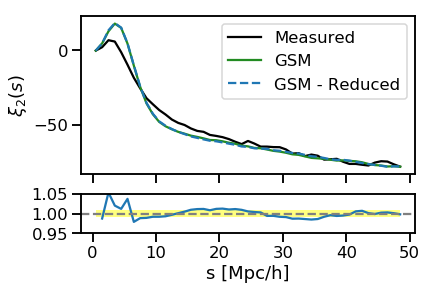

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.plot(measured.s_c, measured.s_c * measured.s_c * measured.quad,
        color = 'black', label = 'Measured')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.quad,
         color = 'forestgreen', label = 'GSM')
ax1.plot(gaussian_reduced.s_c, gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian_reduced.quad,
                label = 'GSM - Reduced', linestyle='dashed')

ax1.legend()
ax2.plot(gaussian_reduced.s_c[1:], gaussian_reduced.quad[1:]/gaussian.quad[1:])
ax2.axhline(y = 1., linestyle='dashed', color='gray')
ax2.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(0.95,1.05)

ax1.set_ylabel(r'$\xi_2 (s)$')
ax2.set_xlabel(r's [Mpc/h]')

Text(0.5,0,'s [Mpc/h]')

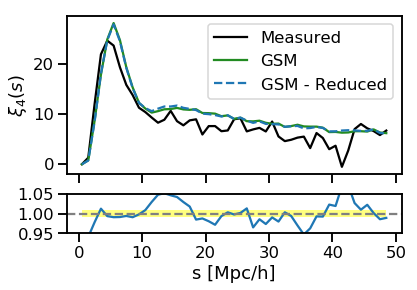

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.plot(measured.s_c, measured.s_c * measured.s_c * measured.hexa,
        color = 'black', label = 'Measured')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * gaussian.hexa,
         color = 'forestgreen', label = 'GSM')
ax1.plot(gaussian_reduced.s_c, gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian_reduced.hexa,
                label = 'GSM - Reduced', linestyle='dashed')

ax1.legend(bbox_to_anchor=(1,1))

ax2.plot(gaussian_reduced.s_c[1:], gaussian_reduced.hexa[1:]/gaussian.hexa[1:])
ax2.axhline(y = 1., linestyle='dashed', color='gray')
ax2.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax2.set_ylim(0.95,1.05)

ax1.set_ylabel(r'$\xi_4 (s)$')
ax2.set_xlabel(r's [Mpc/h]')

## TAYLOR EXPANSION

In [44]:
import importlib
importlib.reload(stt)

<module 'spline_taylor_tools' from '/cosma/home/dp004/dc-cues1/CentralStreamingModel/dimred/spline_taylor_tools.py'>

In [112]:
mono_1, quad_1, hexa_1 = stt.approximation(s, 1, 
                    xi_spl, m_r_spl, c_r_spl, c_t_spl, rm.tpcf_dict)
mono_2, quad_2, hexa_2 = stt.approximation(s, 2,
                    xi_spl, m_r_spl, c_r_spl, c_t_spl, rm.tpcf_dict)


In [113]:
mono_1_derivatives, quad_1_derivatives, hexa_1_derivatives = stt.approximation(s, 1,
                xi_spl, m_r_spl, c_r_spl, c_t_spl, 
                rm.tpcf_dict, derivatives = True)
mono_2_derivatives, quad_2_derivatives, hexa_2_derivatives = stt.approximation(s, 2,
                xi_spl, m_r_spl, c_r_spl, c_t_spl, 
                rm.tpcf_dict, derivatives = True)

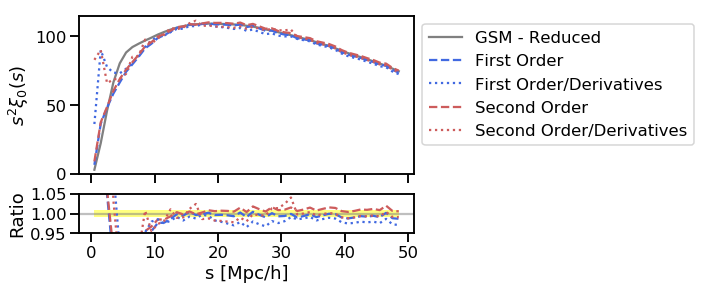

In [114]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.plot(gaussian_reduced.s_c, 
         gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian_reduced.mono, 
         label = 'GSM - Reduced', color='gray')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * mono_1, 
         label = 'First Order', linestyle='dashed', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * mono_1_derivatives, 
         label = 'First Order/Derivatives', linestyle='dotted', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * mono_2,
         label = 'Second Order', linestyle='dashed', color = 'indianred')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * mono_2_derivatives,
         label = 'Second Order/Derivatives', linestyle='dotted', color = 'indianred')

ax2.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.5)

ax2.plot(gaussian_reduced.s_c[1:], 
         mono_1[1:]/gaussian_reduced.mono[1:],
         color = 'royalblue', linestyle='dashed')
ax2.plot(gaussian_reduced.s_c[1:],
         mono_2[1:]/gaussian_reduced.mono[1:], 
        color = 'indianred', linestyle='dashed')

ax2.plot(gaussian_reduced.s_c[1:], 
         mono_1_derivatives[1:]/gaussian_reduced.mono[1:],
         color = 'royalblue', linestyle='dotted')
ax2.plot(gaussian_reduced.s_c[1:],
         mono_2_derivatives[1:]/gaussian_reduced.mono[1:], 
        color = 'indianred', linestyle='dotted')

ax1.set_ylabel(r'$s^2 \xi_0 (s)$')
ax2.set_xlabel(r's [Mpc/h]')
ax2.set_ylabel(r'Ratio')

ax2.set_ylim(0.95,1.05)
ax1.set_ylim(0.,115)

ax1.legend(bbox_to_anchor=(1,1))

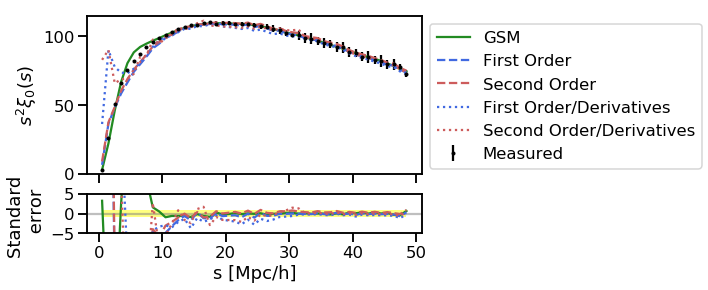

In [115]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})


ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.mono.mean,
            yerr =  rm.s_c * rm.s_c * rm.mono.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(gaussian_reduced.s_c, 
         gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian.mono, 
         label = 'GSM', color='forestgreen')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * mono_1, 
         label = 'First Order', linestyle='dashed', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * mono_2,
         label = 'Second Order', linestyle='dashed', color = 'indianred')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * mono_1_derivatives, 
         label = 'First Order/Derivatives', linestyle='dotted', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * mono_2_derivatives,
         label = 'Second Order/Derivatives', linestyle='dotted', color = 'indianred')

ax2.axhline(y = 0., color='gray', linestyle='-', alpha = 0.5)
ax2.fill_between(gaussian_reduced.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)


ax2.plot(gaussian.s_c, (gaussian.mono - rm.mono.mean)/rm.mono.std,
        color = 'forestgreen')
ax2.plot(gaussian.s_c, (mono_1 - rm.mono.mean)/rm.mono.std,
        color = 'royalblue', linestyle='dashed')
ax2.plot(gaussian.s_c, (mono_2 - rm.mono.mean)/rm.mono.std,
        color = 'indianred', linestyle='dashed')
ax2.plot(gaussian.s_c, (mono_1_derivatives - rm.mono.mean)/rm.mono.std,
        color = 'royalblue', linestyle='dotted')
ax2.plot(gaussian.s_c, (mono_2_derivatives - rm.mono.mean)/rm.mono.std,
        color = 'indianred', linestyle='dotted')



ax1.set_ylabel(r'$s^2 \xi_0 (s)$')
ax2.set_xlabel(r's [Mpc/h]')



ax2.set_ylim(-5.,5)
ax2.set_ylabel("Standard \n error")
ax1.set_ylim(0.,115)


ax1.legend(bbox_to_anchor=(1,1))

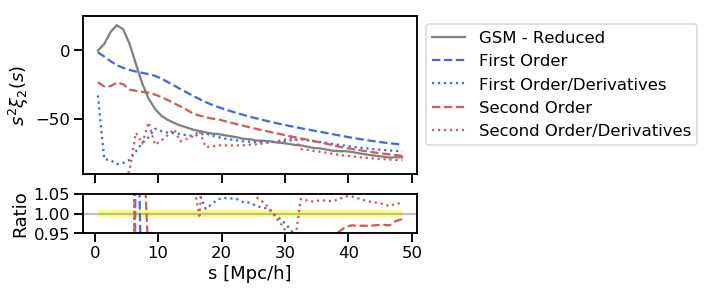

In [116]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.plot(gaussian_reduced.s_c, 
         gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian_reduced.quad, 
         label = 'GSM - Reduced', color='gray')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * quad_1, 
         label = 'First Order', linestyle='dashed', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * quad_1_derivatives, 
         label = 'First Order/Derivatives', linestyle='dotted', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * quad_2,
         label = 'Second Order', linestyle='dashed', color = 'indianred')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * quad_2_derivatives,
         label = 'Second Order/Derivatives', linestyle='dotted', color = 'indianred')

ax2.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.5)

ax2.plot(gaussian_reduced.s_c[1:], 
         quad_1[1:]/gaussian_reduced.quad[1:],
         color = 'royalblue', linestyle='dashed')
ax2.plot(gaussian_reduced.s_c[1:],
         quad_2[1:]/gaussian_reduced.quad[1:], 
        color = 'indianred', linestyle='dashed')

ax2.plot(gaussian_reduced.s_c[1:], 
         quad_1_derivatives[1:]/gaussian_reduced.quad[1:],
         color = 'royalblue', linestyle='dotted')
ax2.plot(gaussian_reduced.s_c[1:],
         quad_2_derivatives[1:]/gaussian_reduced.quad[1:], 
        color = 'indianred', linestyle='dotted')

ax1.set_ylabel(r'$s^2 \xi_2 (s)$')
ax2.set_xlabel(r's [Mpc/h]')
ax2.set_ylabel(r'Ratio')

ax2.set_ylim(0.95,1.05)
ax1.set_ylim(-90,25)

ax1.legend(bbox_to_anchor=(1,1))

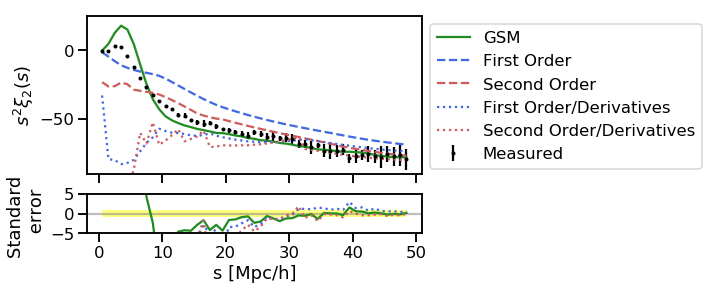

In [117]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})


ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.quad.mean,
            yerr =  rm.s_c * rm.s_c * rm.quad.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(gaussian_reduced.s_c, 
         gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian.quad, 
         label = 'GSM', color='forestgreen')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * quad_1, 
         label = 'First Order', linestyle='dashed', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * quad_2,
         label = 'Second Order', linestyle='dashed', color = 'indianred')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * quad_1_derivatives, 
         label = 'First Order/Derivatives', linestyle='dotted', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * quad_2_derivatives,
         label = 'Second Order/Derivatives', linestyle='dotted', color = 'indianred')

ax2.axhline(y = 0., color='gray', linestyle='-', alpha = 0.5)
ax2.fill_between(gaussian_reduced.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)


ax2.plot(gaussian.s_c, (gaussian.quad - rm.quad.mean)/rm.quad.std,
        color = 'forestgreen')
ax2.plot(gaussian.s_c, (quad_1 - rm.mono.mean)/rm.quad.std,
        color = 'royalblue', linestyle='dashed')
ax2.plot(gaussian.s_c, (quad_2 - rm.mono.mean)/rm.quad.std,
        color = 'indianred', linestyle='dashed')
ax2.plot(gaussian.s_c, (quad_1_derivatives - rm.quad.mean)/rm.quad.std,
        color = 'royalblue', linestyle='dotted')
ax2.plot(gaussian.s_c, (quad_2_derivatives - rm.quad.mean)/rm.quad.std,
        color = 'indianred', linestyle='dotted')



ax1.set_ylabel(r'$s^2 \xi_2 (s)$')
ax2.set_xlabel(r's [Mpc/h]')



ax2.set_ylim(-5.,5)
ax2.set_ylabel("Standard \n error")
ax1.set_ylim(-90,25)


ax1.legend(bbox_to_anchor=(1,1))

In [118]:
import numpy as np
2 * np.pi / 0.2

31.41592653589793

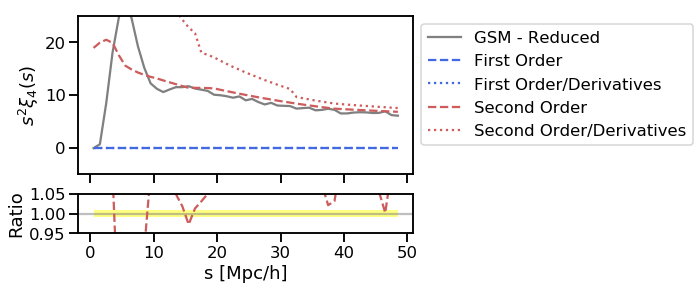

In [119]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})

ax1.plot(gaussian_reduced.s_c, 
         gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian_reduced.hexa, 
         label = 'GSM - Reduced', color='gray')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * hexa_1, 
         label = 'First Order', linestyle='dashed', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * hexa_1_derivatives, 
         label = 'First Order/Derivatives', linestyle='dotted', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * hexa_2,
         label = 'Second Order', linestyle='dashed', color = 'indianred')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * hexa_2_derivatives,
         label = 'Second Order/Derivatives', linestyle='dotted', color = 'indianred')

ax2.fill_between(gaussian.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
ax2.axhline(y = 1., linestyle='-', color='gray', alpha = 0.5)

ax2.plot(gaussian_reduced.s_c[1:], 
         hexa_1[1:]/gaussian_reduced.hexa[1:],
         color = 'royalblue', linestyle='dashed')
ax2.plot(gaussian_reduced.s_c[1:],
         hexa_2[1:]/gaussian_reduced.hexa[1:], 
        color = 'indianred', linestyle='dashed')

ax2.plot(gaussian_reduced.s_c[1:], 
         hexa_1_derivatives[1:]/gaussian_reduced.hexa[1:],
         color = 'royalblue', linestyle='dotted')
ax2.plot(gaussian_reduced.s_c[1:],
         hexa_2_derivatives[1:]/gaussian_reduced.hexa[1:], 
        color = 'indianred', linestyle='dotted')

ax1.set_ylabel(r'$s^2 \xi_4 (s)$')
ax2.set_xlabel(r's [Mpc/h]')
ax2.set_ylabel(r'Ratio')

ax2.set_ylim(0.95,1.05)
ax1.set_ylim(-5,25)

ax1.legend(bbox_to_anchor=(1,1))

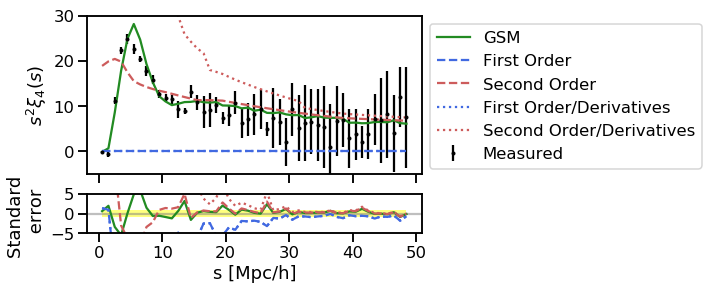

In [124]:
fig, (ax1, ax2) = plt.subplots(nrows=2,sharex = True, squeeze = True,
                          gridspec_kw = {'height_ratios':[4,1]})


ax1.errorbar(rm.s_c, rm.s_c * rm.s_c * rm.hexa.mean,
            yerr =  rm.s_c * rm.s_c * rm.hexa.std,
            color = 'black', linestyle='',
             label = 'Measured', marker='o',
             markersize=3)

ax1.plot(gaussian_reduced.s_c, 
         gaussian_reduced.s_c * gaussian_reduced.s_c * gaussian.hexa, 
         label = 'GSM', color='forestgreen')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * hexa_1, 
         label = 'First Order', linestyle='dashed', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * hexa_2,
         label = 'Second Order', linestyle='dashed', color = 'indianred')

ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * hexa_1_derivatives, 
         label = 'First Order/Derivatives', linestyle='dotted', color = 'royalblue')
ax1.plot(gaussian.s_c, gaussian.s_c * gaussian.s_c * hexa_2_derivatives,
         label = 'Second Order/Derivatives', linestyle='dotted', color = 'indianred')

ax2.axhline(y = 0., color='gray', linestyle='-', alpha = 0.5)
ax2.fill_between(gaussian_reduced.s_c,-1., 1., facecolor = 'yellow', alpha = 0.5)


ax2.plot(gaussian.s_c, (gaussian.hexa - rm.hexa.mean)/rm.hexa.std,
        color = 'forestgreen')
ax2.plot(gaussian.s_c, (hexa_1 - rm.hexa.mean)/rm.hexa.std,
        color = 'royalblue', linestyle='dashed')
ax2.plot(gaussian.s_c, (hexa_2 - rm.hexa.mean)/rm.hexa.std,
        color = 'indianred', linestyle='dashed')
ax2.plot(gaussian.s_c, (hexa_1_derivatives - rm.hexa.mean)/rm.hexa.std,
        color = 'royalblue', linestyle='dotted')
ax2.plot(gaussian.s_c, (hexa_2_derivatives - rm.hexa.mean)/rm.hexa.std,
        color = 'indianred', linestyle='dotted')



ax1.set_ylabel(r'$s^2 \xi_4 (s)$')
ax2.set_xlabel(r's [Mpc/h]')



ax2.set_ylim(-5.,5)
ax2.set_ylabel("Standard \n error")
ax1.set_ylim(-5,30)


ax1.legend(bbox_to_anchor=(1,1))